### Treść zadania

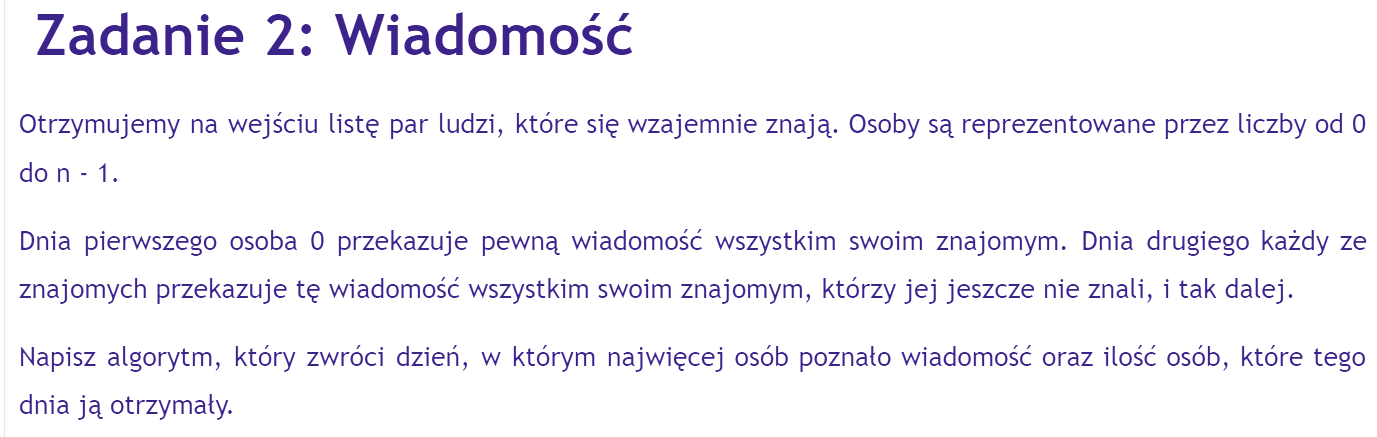

### Omówienie algorytmu

Zadanie na proste zastosowanie algorytmu BFS i jego własności, polegającej na tym, że działa on niczym fale na wodzie (w każdej "iteracji" algorytmu, równomiernie rozchodzi się ta "fala" po kolejnych wierzchołkach grafu). Wystarczy dodać licznik, który będzie aktualizowany podczas odwiedzenia każdego kolejnego wierzchołka i resetowany przy trafieniu na wierzchołek, który jest rozpatrywany w kolejnej "iteracji" (kolejnym dniu). Aby wiedzieć w jakiś sposób, z którą "iteracją" algorytmu (którym dniem) mamy do czynienia, w kolejce będziemy umieszczać krotki postaci $ (wierzchołek, dzień) $, gdzie $ wierzchołek $ jest indeksem wierzchołka, który ma zostać później odwiedzony, a $ dzień $ jest numerem dnia, w którym to odwiedzenie nastąpi. Za każdym razem, dodając wierzchołek do kolejki, dodajemy go z dniem o jeden większym od bieżącego. Bieżący dzień powiększamy o 1 (zastępujemy następnym), jeżeli zdjęty element z kolejki ma większy zapisany dzień od obecnego. W tym momencie również resetujemy licznik przekazanych wiadomości danego dnia, uprzednio sprawdzając, czy jego wartość była większa od największej zapamiętanej. Jeżeli tak, to zapamiętujemy tę wartość oraz numer dnia, w którym nastąpiło przekazanie największej liczby informacji.
<br><br>
Jeszcze takie notatki końcowe. W tej sytuacji najlepiej użyć grafu reprezentowanego przy pomocy list sąsiedztwa, ponieważ sytuacja, w którym każdy zna wszystkich raczej jest niemożliwa i pozbawiona sensu (każdy otrzymałby wiadomość 1. dnia). Zatem, raczej będzie dużo wierzchołków (osób) i mało krawędzi (relacji znajomości).

### Złożoność

Identyczna do algorytmu BFS dla listowej reprezentacji grafu.
###### Obliczeniowa:
$ O(V + E) $, gdzie $ V $ - liczba wierzchołków, $ E $ - liczba krawędzi,
###### Pamięciowa:
$ O(V) $, gdzie $ V $ - liczba wierzchołków,

### Implementacja

In [1]:
from queue import Queue


def spread_news(G: 'graph represented using adjacency list'):
    n = len(G)
    q = Queue()
    visited = [False] * n
    q.put((0, 0))
    visited[0] = True
    counter = 0
    best_day = curr_day = 0
    max_count = 0
     
    while not q.empty():
        u, day = q.get()
        
        if day == curr_day:
            counter += 1
        else:
            print(curr_day, counter)
            if counter > max_count:
                max_count = counter
                best_day = curr_day
            curr_day = day
            counter = 1
            
        for v in G[u]:
            if not visited[v]:
                visited[v] = True
                q.put((v, day + 1))
                
    return best_day, max_count


def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

###### Kilka testów

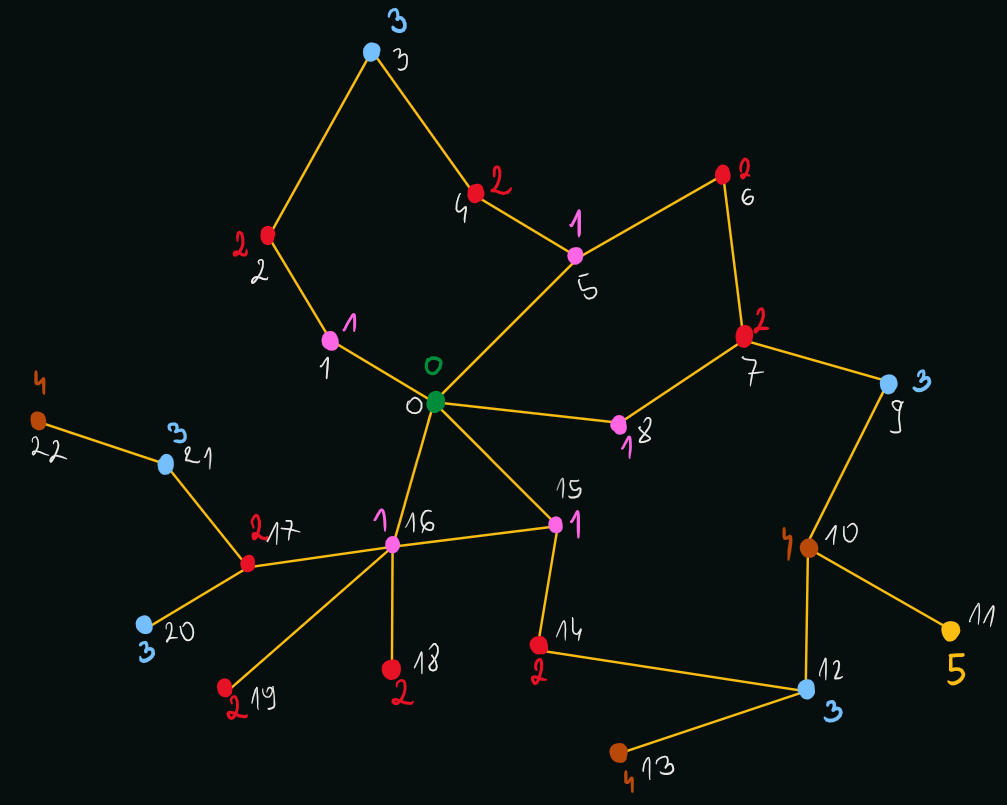

In [2]:
E = [(22, 21), (21, 17), (20, 17), (16, 17), (16, 19), (16, 18), (16, 0), (0, 1), (1, 2), (2, 3),
     (3, 4), (4, 5), (5, 0), (5, 6), (6, 7), (7, 8), (8, 0), (7, 9), (9, 10), (10, 11), (10, 12),
     (12, 13), (12, 14), (14, 15), (16, 15), (0, 15)]

G = undirected_graph_list(E, 23)
print(spread_news(G))

0 1
1 5
2 8
3 5
4 3
(2, 8)


In [3]:
E = [(22, 21), (21, 17), (20, 17), (16, 17), (16, 19), (16, 18), (16, 0), (0, 1), (1, 2), (2, 3),
     (3, 4), (4, 5), (5, 0), (5, 6), (6, 7), (7, 8), (8, 0), (7, 9), (9, 10), (10, 11), (10, 12),
     (12, 13), (12, 14), (14, 15), (16, 15), (0, 15), *((11, i) for i in range(23, 40))]

G = undirected_graph_list(E, 40)
print(spread_news(G))

0 1
1 5
2 8
3 5
4 3
5 1
(2, 8)
